<a href="https://colab.research.google.com/github/abdelghafourbk/AutomateJS/blob/main/Copy_of_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("kc_house_data.csv")

In [3]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530.0,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310.0,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020.0,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600.0,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
df.drop(["id"],axis=1,inplace=True)

In [6]:
df.columns.unique()

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

identifying quantative and categorical variables 

<Figure size 1080x1080 with 0 Axes>

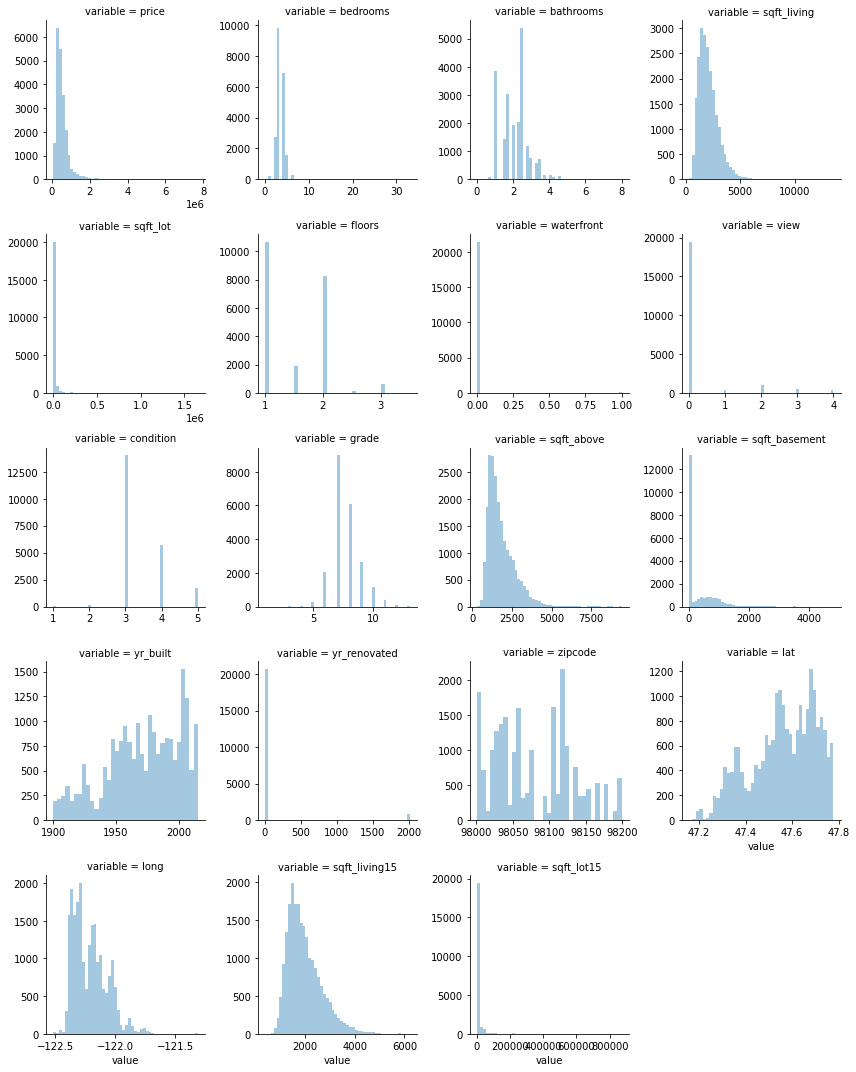

In [7]:
plt.figure(figsize=[15,15])
f = pd.melt(df.drop("date",axis=1))
facet=sns.FacetGrid(data=f,col="variable",col_wrap=4,sharex=False,sharey=False)
facet=facet.map(sns.distplot,"value",kde=False)

In [8]:
#from the above plots we identify the following as categorical variables 

cat_columns = ["condition","waterfront","view","grade","zipcode"]

#convert them into category type
df[cat_columns]=df[cat_columns].astype("category")



In [9]:
#checking null values
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [10]:
df.describe(include=np.number)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21611.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,1788.396095,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,828.128162,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


Text(0.5, 1.0, 'after log transform')

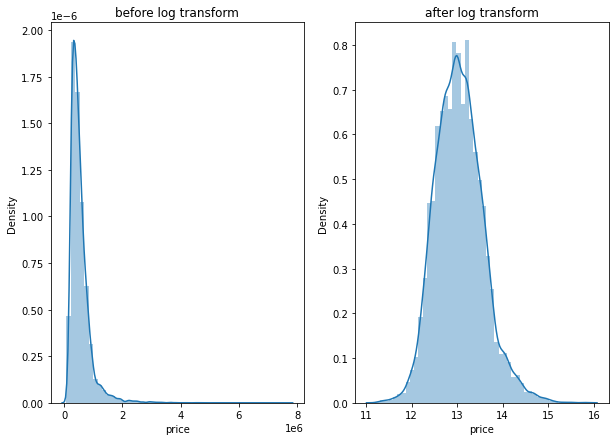

In [11]:

fig,axs=plt.subplots(nrows=1,ncols=2,figsize=[10,7])


sns.distplot(df.price,ax=axs[0])
sns.distplot(np.log1p(df.price),ax=axs[1])
axs[0].set_title("before log transform")
axs[1].set_title("after log transform")


check the normality 

((array([-3.99703558, -3.78181236, -3.66408326, ...,  3.66408326,
          3.78181236,  3.99703558]),
  array([11.22525673, 11.26447693, 11.28979441, ..., 15.74485584,
         15.7703098 , 15.85673102])),
 (0.5239049133783698, 13.0478193715726, 0.9945706227337197))

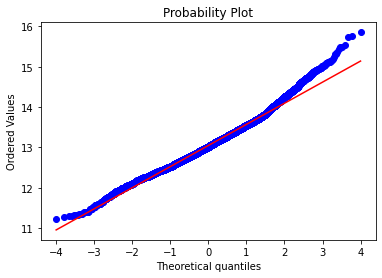

In [12]:
st.probplot(np.log1p(df.price),plot=plt)

## correlation between categorical and the target

In [13]:
anova = []
#we use the transformed price column because Anova test assumes normality
df["price_"]=np.log1p(df["price"])
columns = df.select_dtypes(include="category").columns
for column in columns:
  column_prices=[]
  keys = df[column].unique().tolist()
  for category in keys :  # df[column]unique()
      price=df[df[column]==category]["price_"]
      column_prices.append(price)   
  t,pvalue=st.f_oneway(*column_prices)
  anova.append(pvalue)

s=pd.Series(anova,index=columns)
s

# perform multiple pairwise comparison (Tukey HSD)
#m_comp = pairwise_tukeyhsd(endog=df['price'], groups=df['condition'], alpha=0.05)
#print(m_comp)


waterfront    1.694958e-147
view           0.000000e+00
condition      5.346122e-64
grade          0.000000e+00
zipcode        0.000000e+00
dtype: float64

from the above results ,we can conclude that the categorical varibles has an impact on target variable , since according to the ANOVA test , each group yield different price means and thus they are different

let's visualize the impact of those categorical variables on price again using boxplot :


<Figure size 3240x720 with 0 Axes>

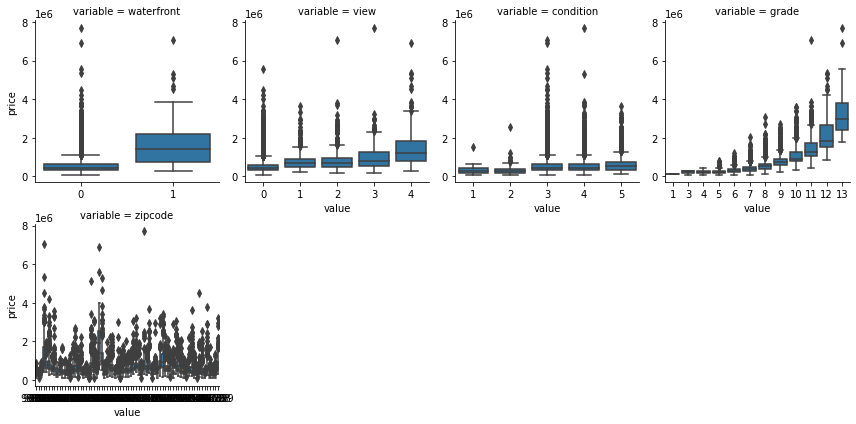

In [14]:
plt.figure(figsize=(45,10))
columns = df.select_dtypes(include="category").columns
f = pd.melt(df.drop("date",axis=1),id_vars=["price"],value_vars=columns)
facet=sns.FacetGrid(data=f,col="variable",col_wrap=4,sharex=False,sharey=False)

facet=facet.map(sns.boxplot,"value","price")

we can clearly notice that there's a salient difference in variances and means between groups of each categorical variables

**Conclusion** : 
we need to include categorical variables in our input X 

## correlation between numerical variables and the target

In [15]:
df_numerical=df.select_dtypes(include=np.number)


corr=pd.DataFrame()

price=df_numerical.price

df_numerical.drop(["price","price_"],axis=1,inplace=True)

numerical_columns=df_numerical.columns
corr["features"]=numerical_columns


#sns.barplot(x="pearson_corr",y="features",orient="h",data=corr)

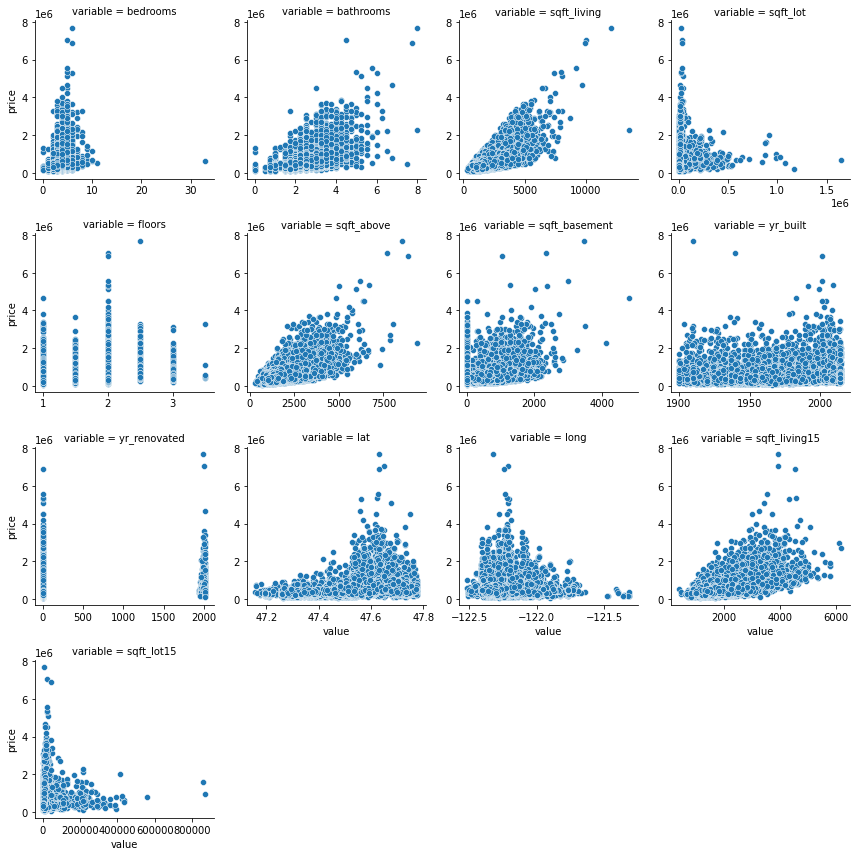

In [16]:
columns = df_numerical.columns

f = pd.melt(df.drop("date",axis=1),id_vars=["price"],value_vars=columns)
facet=sns.FacetGrid(data=f,col="variable",col_wrap=4,sharex=False,sharey=False)

facet=facet.map(sns.scatterplot,"value","price")

most of the relationship between variables are non linear , some of them also contains outliers , that means the pearson correlation is not well adapted and miss important informations. especially with ordinal varialbes like num of ``floors``. in addition , the pearson correlation assumes normality of variables , let's again test the latter using ``stats.normaltest`` 

In [17]:
corr["pvalue"] = corr.features.apply(lambda x : st.normaltest(df[x])[1] )
corr

,features,pvalue
0,bedrooms,0.000000e+00
1,bathrooms,1.068047e-309
2,sqft_living,0.000000e+00
3,sqft_lot,0.000000e+00
4,floors,0.000000e+00
5,sqft_above,NaN
6,sqft_basement,0.000000e+00
7,yr_built,0.000000e+00
8,yr_renovated,0.000000e+00
9,lat,0.000000e+00


as you may notice most variables reject the null hypothesis and has a small p-value( nearly zero) for all variables , that means we would be better-off using non-parametric methods like ``spearman`` correlation. 

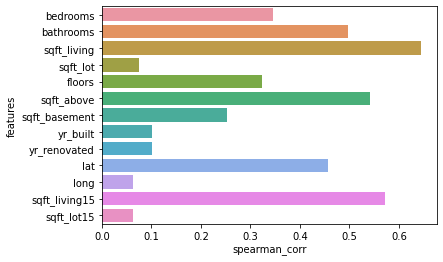

In [18]:
corr["spearman_corr"]=[df_numerical[column].corr(price,"spearman") for column in numerical_columns]



sns.barplot(x="spearman_corr",y="features",orient="h",data=corr)



In [19]:
corr.describe()

,pvalue,spearman_corr
count,1.200000e+01,13.000000
mean,8.900395e-311,0.310435
std,0.000000e+00,0.215848
min,0.000000e+00,0.062766
25%,0.000000e+00,0.101876
50%,0.000000e+00,0.322347
75%,0.000000e+00,0.497160
max,1.068047e-309,0.644191


from the plot above , we can notice that most variables are between 0.2 to  0.5 , which are not highly correlated , with a maximum correlation was noticed between price and ``sqft_living``

# modeling

## linear regression model 

In [20]:
from sklearn.model_selection import train_test_split


X = df["sqft_living"].values.reshape(-1,1)
y= df["price"]
SEED=30
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=SEED)


X_train != X_test & y_train != y_test

In [21]:
X_train

array([[ 970],
       [2040],
       [1830],
       ...,
       [3230],
       [1930],
       [1120]])

In [22]:
y_test

20999    353500.0
20641    384950.0
7065     340000.0
21068    400950.0
6715     602000.0
           ...   
6341     490000.0
13768    372000.0
2210     760000.0
17689    605000.0
19740    585000.0
Name: price, Length: 4323, dtype: float64

In [23]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score , mean_squared_error

model=LinearRegression()

model.fit(X_train,y_train)

pred=model.predict(X_test)

print("MSE ",mean_squared_error(y_test,pred))
print("R^2 ",r2_score(y_test,pred))


MSE  64179676631.68388
R^2  0.4879814110728805


Text(0.05, 0.5, '$y = 282.54 x_1 - 46813.82 $')

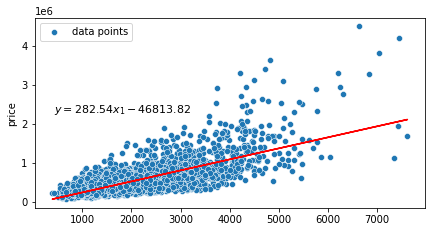

In [24]:
fig, ax = plt.subplots(figsize=(7, 3.5))

sns.scatterplot(X_test.squeeze(),y_test,label="data points",ax=ax)
plt.plot(X_test.squeeze(),pred,color="r",label="regression model")
ax.text(0.05, 0.50, '$y = %.2f x_1 - %.2f $' % (model.coef_[0], abs(model.intercept_)), fontsize=11, transform=ax.transAxes)
